3.1. MNIST
- => 데이터셋 설명 : 손으로 쓴 70000개의 작은 숫자 이미지


In [142]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False) # 이미지 파일이기 때문에 데이터프레임은 잘 맞지 않아 교재에서는 넘파이 배열로 데이터를 받았음.

c:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [63]:
X, y = mnist.data, mnist.target
X # 데이터

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
X.shape

(70000, 784)

In [65]:
y # 타겟(정답지)

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [66]:
# y.shape

(70000,)

In [143]:
# 책을 따라서 입력을 해 보았는데 직접 그림판으로 그린 이미지를 불러왔더니 reshape이 되지 않는 문제가 발생하였다.

# import matplotlib.pyplot as plt

# def plot_digit(image_data) : #이미지 데이터 출력 함수.
#     image = image_data.reshape(28,28) # 28*28 배열로 크기 조정
#     plt.imshow(image, cmap='binary') # binary = 0을 흰색, 255를 검은색으로 나타내는 흑백 컬러맴
#     plt.axis('off') # 무슨 뜻? => 축을 표기하지 않음.

# some_digit = X[0] # Aㅏ. 데이터 안에 들어있는 첫번째 이미지.
# print(some_digit)
# plot_digit(some_digit)
# plt.show()
# print(type(some_digit)) # 파일 확인해봄.`b`

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

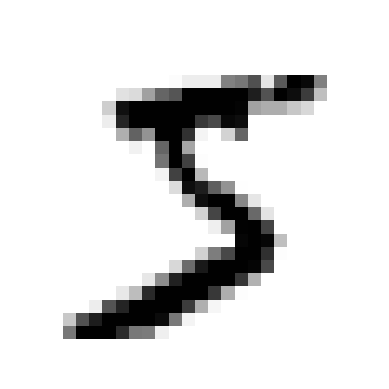

<class 'numpy.ndarray'>


In [137]:
# 무수한 시행착오 끝에 그냥 reshape 문장을 밖으로 빼냈다.
import matplotlib.pyplot as plt

def plot_digit(image) : #이미지 데이터 출력 함수.
    plt.imshow(image, cmap='binary') # binary = 0을 흰색, 255를 검은색으로 나타내는 흑백 컬러맵
    plt.axis('off') # 무슨 뜻? => 축을 표기하지 않음.

some_digit = X[0] # Aㅏ. 데이터 안에 들어있는 첫번째 이미지.
some_digit = some_digit.reshape(28,28)
print(some_digit)
plot_digit(some_digit)
plt.show()
print(type(some_digit)) # 파일 확인해봄.

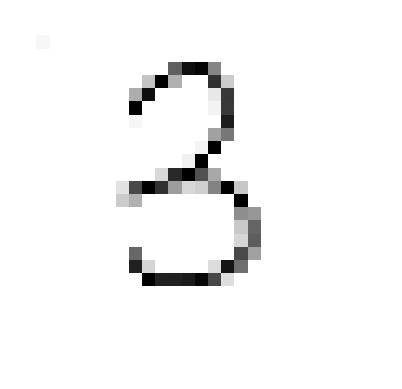

In [141]:
# 이미지를 사용하기 위해 PIL 모듈을 불러왔다.
from PIL import Image
import numpy as np

path = '33.png' #그림 경로
img = Image.open(path) # 그림 파일 연다
img = img.convert('L') # 그레이스케일로 변경
img = np.array(img) # narray로 형태 변환

# 이대로 넣었더니 원인은 모르겠지만 흑백이 반전되는 이슈 발생.
# 주영 님의 도움을 받아 img를 int로 형변환하고 0(흰색)으로 표시되었던 부분에 -255를 한 다음, 절댓값을 취함으로서 반전. 
img = abs(img.astype('int')-255) 

plot_digit(img) # >> 성공적으로 출력되었다.

In [ ]:

y[0] # 위 이미지의 실제 글자..정보

'5'

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
y_test.shape

(10000,)

In [ ]:
# 이진 분류기 훈련 
y_train_5 = (y_train == '5') # '5' == True 나머지는 False
y_test_5 = (y_test == '5')

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

In [ ]:
# 성능 측정
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3) # 훈련세트를 k개 (여기서 3개)로 나눈다.
for train_index, test_index in skfolds.split(X_train, y_train_5) :
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))


0.95035
0.96035
0.9604


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))
# False가 출력됩니다. 즉, True로 예측된 것이 없습니다.

False


In [ ]:
cross_val_score(dummy_clf, X_train, y_train_5, cv =3, scoring = 'accuracy') 

array([0.90965, 0.90965, 0.90965])

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [ ]:
y_train_perfect_predictions = y_train_5 # 완벽한 분류기일 경우
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores >threshold)
y_some_digit_pred

array([ True])

In [ ]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method='decision_function')

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

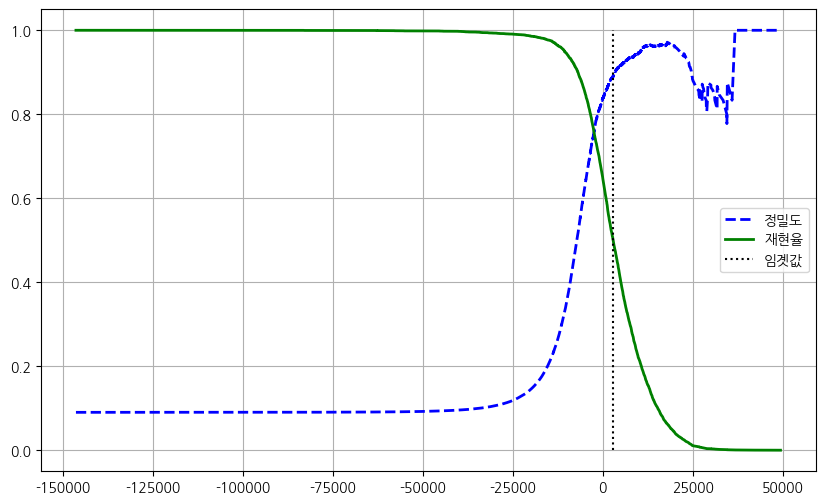

In [ ]:
import koreanize_matplotlib
plt.figure(figsize=(10,6))
plt.plot(thresholds, precisions[:-1], 'b--', label = '정밀도', linewidth = 2)
plt.plot(thresholds, recalls[:-1], 'g-', label = '재현율', linewidth = 2)
plt.vlines(threshold, 0, 1.0, 'k', 'dotted', label='임곗값')
plt.grid()
plt.legend()
plt.show()

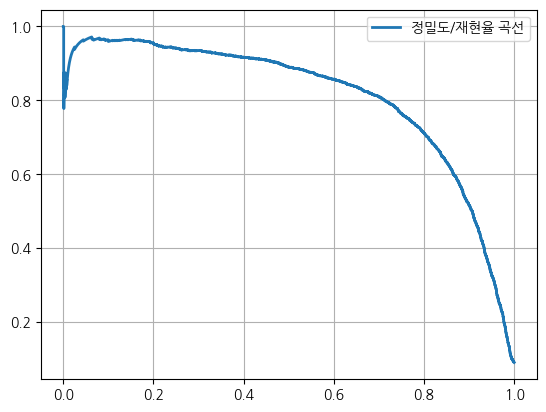

In [ ]:
plt.plot(recalls, precisions, linewidth=2, label='정밀도/재현율 곡선')
plt.grid()
plt.legend()
plt.show()